In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data analysis here will be different than old project

Target variable is continuous, so we need to analyse relationship between continuous-continuous and discrete-continuous variables

Also need to analyse the case of Home Team Goals and Away Team Goals

In [2]:
df = pd.read_csv("data/new_model.csv")

In [3]:
df.date = pd.to_datetime(df.date)

In [4]:
possible_features = ["rank_home", "rank_away"] + df.columns[8:25].tolist() + df.columns[37:-2].tolist()

In [5]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)

In [6]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)

In [7]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]

In [8]:
#df_model = df_model[(df_model.home_score < 7) & (df_model.away_score < 7)]

In [9]:
df_model[["home_team", "away_team", "home_score", "away_score", "home_goals_mean", "home_goals_mean_l5"]]

,home_team,away_team,home_score,away_score,home_goals_mean,home_goals_mean_l5
206,Iraq,Bahrain,2.0,2.0,1.714286,1.2
208,Bahrain,Saudi Arabia,1.0,0.0,1.125000,1.2
316,Spain,Switzerland,1.0,0.0,2.714286,3.4
317,Ukraine,Germany,1.0,2.0,1.428571,1.2
318,Luxembourg,Cyprus,2.0,0.0,0.714286,1.0
...,...,...,...,...,...,...
3685,Australia,Palestine,5.0,0.0,1.829268,2.8
3686,Cuba,Cayman Islands,3.0,0.0,1.107143,0.4
3687,Guyana,Belize,3.0,1.0,2.000000,2.2
3688,Dominican Republic,British Virgin Islands,4.0,0.0,1.375000,0.8


### Home Team 

- Regression Line -> find most correlated
- KDE plot -> not visible correlation, but significant changes in distribution

In [10]:
target = 'home_score'

In [11]:
df_feats = df_model[[target] + possible_features]

In [15]:
possible_features[10:20]

['home_rank_mean_l5',
 'home_points_mean',
 'home_points_mean_l5',
 'away_goals_mean',
 'away_goals_mean_l5',
 'away_goals_suf_mean',
 'away_goals_suf_mean_l5',
 'away_rank_mean',
 'away_rank_mean_l5',
 'total_games_away']

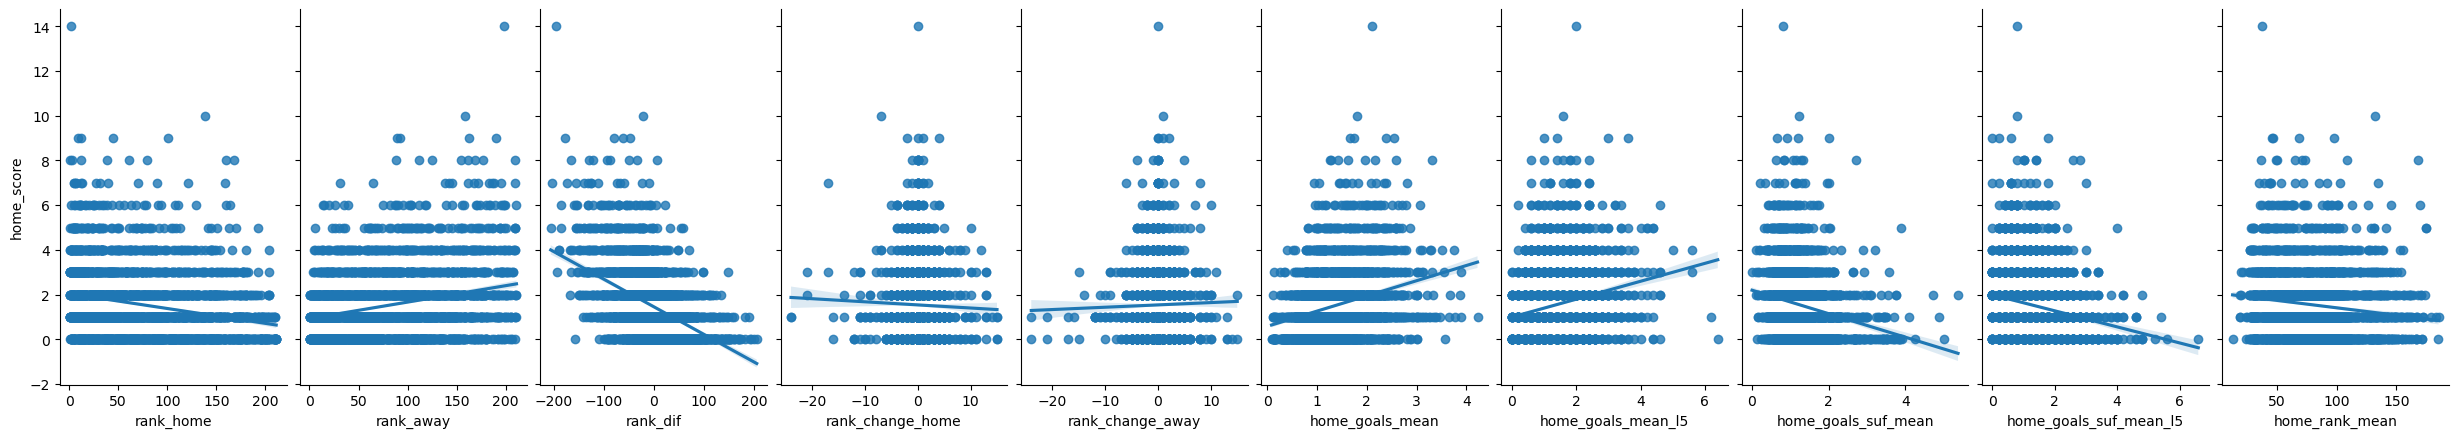

In [27]:

#for i in [10, 20, 29]:
g = sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features[:10],
            )
g.fig.set_size_inches(25,5)

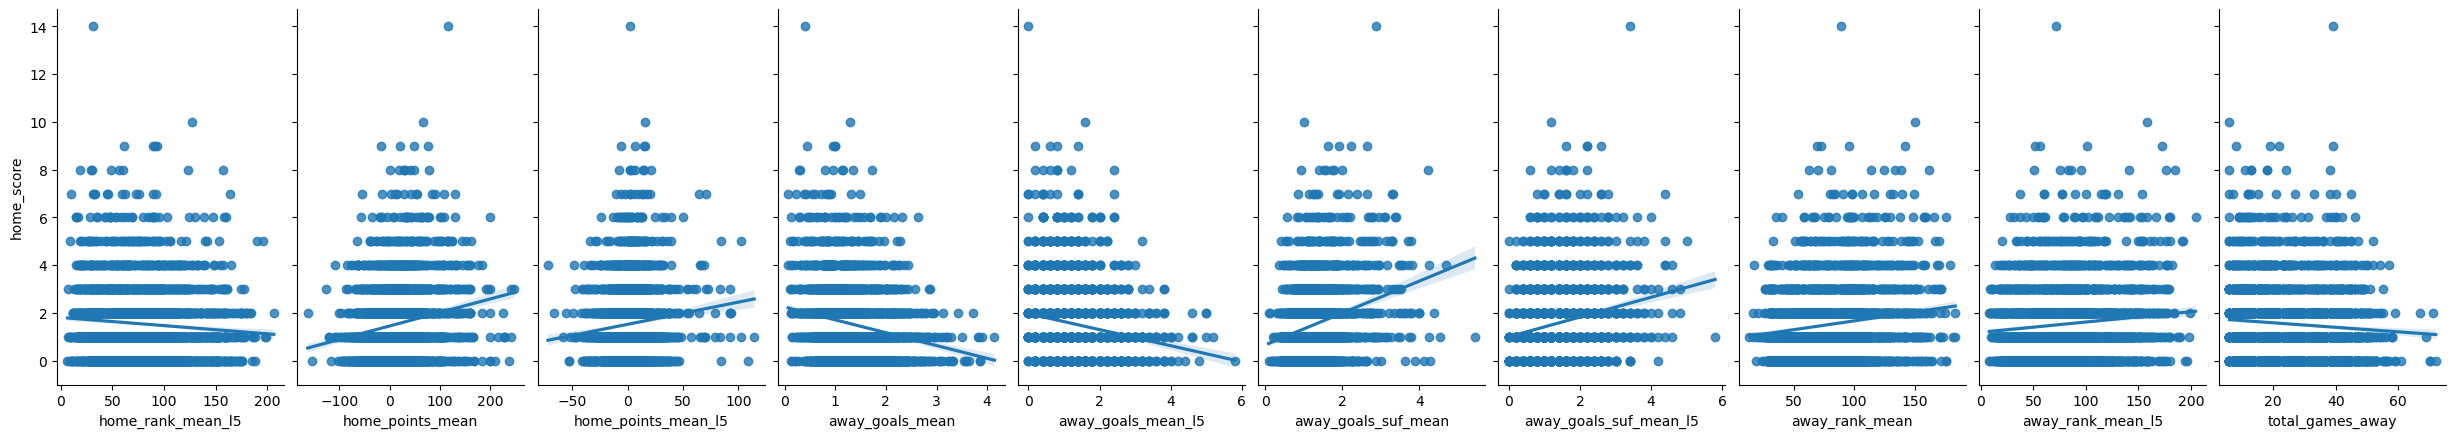

In [28]:

#for i in [10, 20, 29]:
g = sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features[10:20],
            )
g.fig.set_size_inches(25,5)

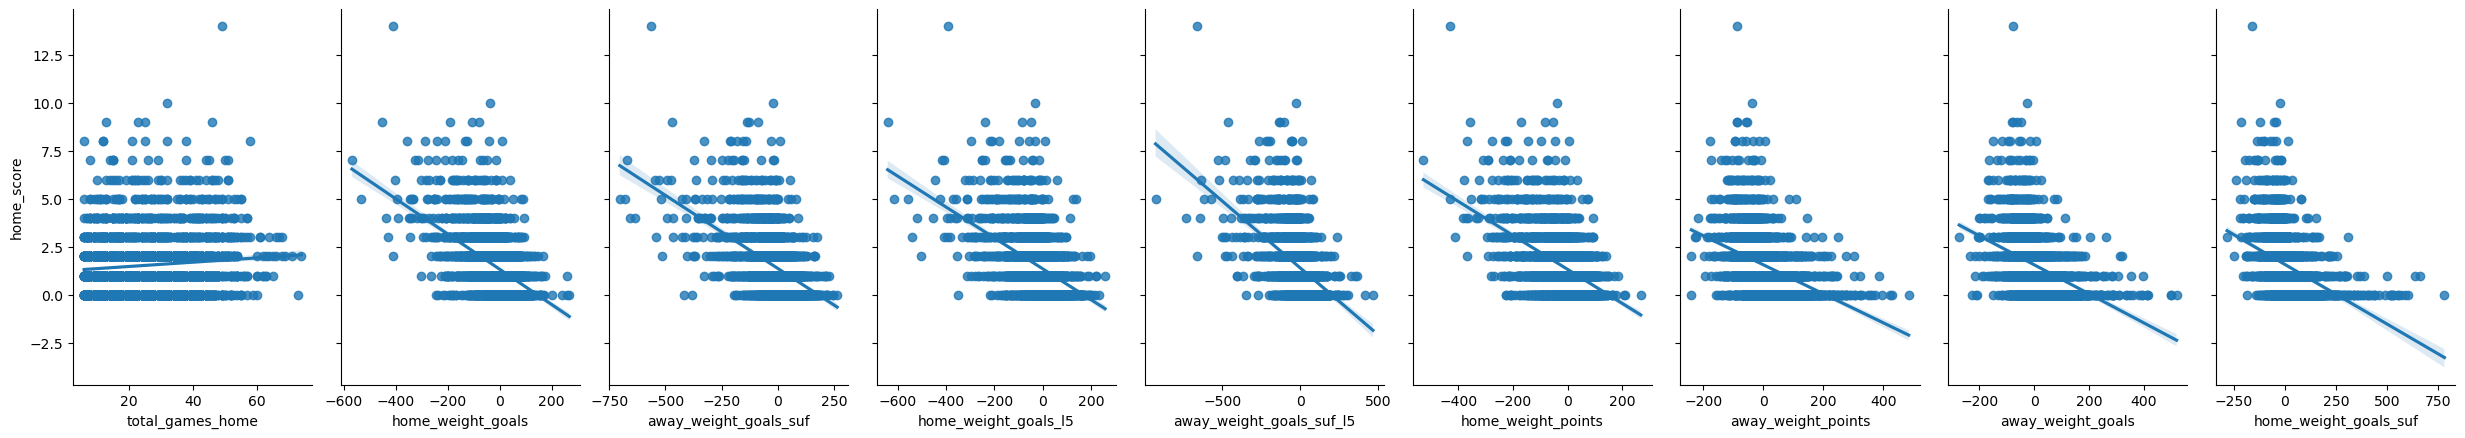

In [29]:

#for i in [10, 20, 29]:
g = sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features[20:],
            )
g.fig.set_size_inches(25,5)

rank_dif -> visible relantionship


below we can evaluate to see if their values are impacting in the distribution of the home goals:

 'home_weight_goals',
 'away_weight_goals_suf',
 'home_weight_goals_l5',
 'away_weight_goals_suf_l5',
 'home_weight_points',
 'away_weight_points',

Since goals is a continuous variable that follows a poisson distribution, with very limited values, using only a regression to select the variables is very unuseful. I'll analyse also the distributions

In [13]:
pos_cols = [['home_weight_goals','home_weight_goals_l5',],
            ['away_weight_goals_suf','away_weight_goals_suf_l5',],
            ['home_weight_points','away_weight_points',]]

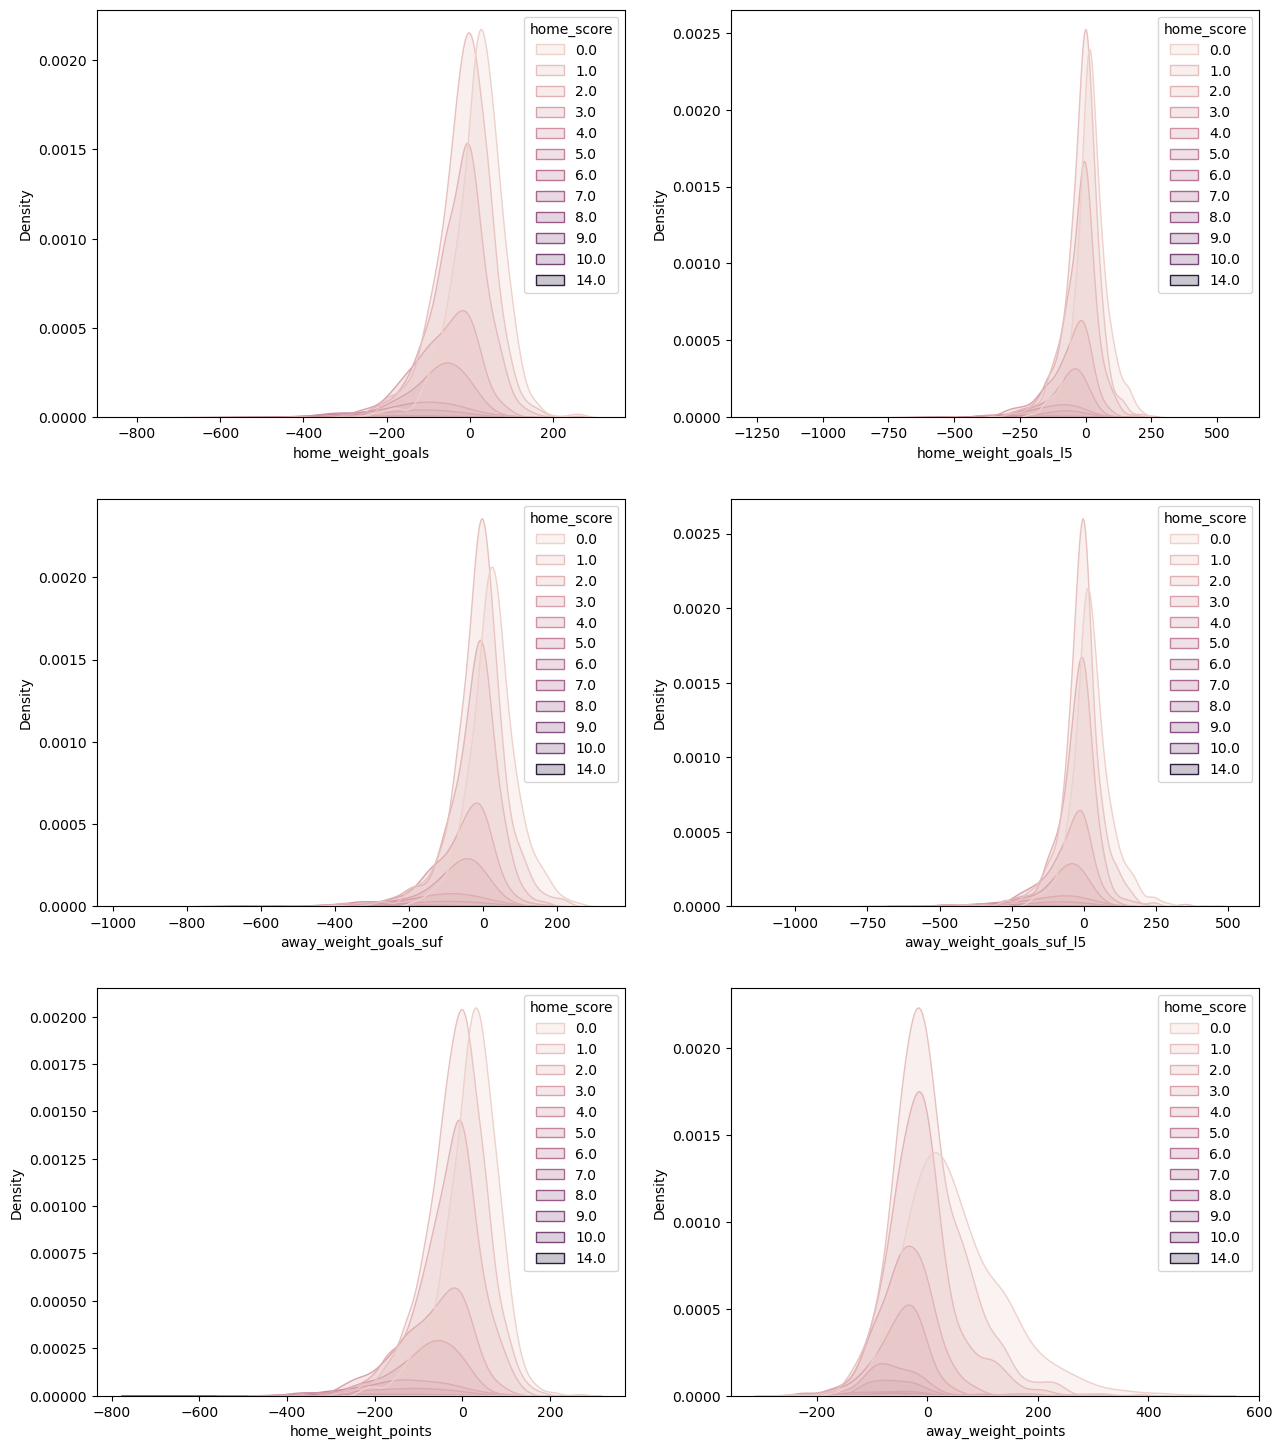

In [14]:
f, axes = plt.subplots(3, 2, figsize=(15, 18))

for (ax, pc) in zip(axes, pos_cols):
    sns.kdeplot(data = df_feats, x = pc[0], hue = target, fill=True, warn_singular=False, ax=ax[0])
    sns.kdeplot(data = df_feats, x = pc[1], hue = target, fill=True, warn_singular=False, ax=ax[1])

In [15]:
home_cols = ["home_weight_goals", "away_weight_goals_suf", 'home_weight_points','away_weight_points']

In [16]:
df_model[["home_score"]+home_cols].to_csv("data/home_db.csv", index=False)

### Away Team 

- Regression Line -> find most correlated
- KDE plot -> not visible correlation, but significant changes in distribution

In [17]:
target = 'away_score'

In [18]:
df_feats = df_model[[target] + possible_features]

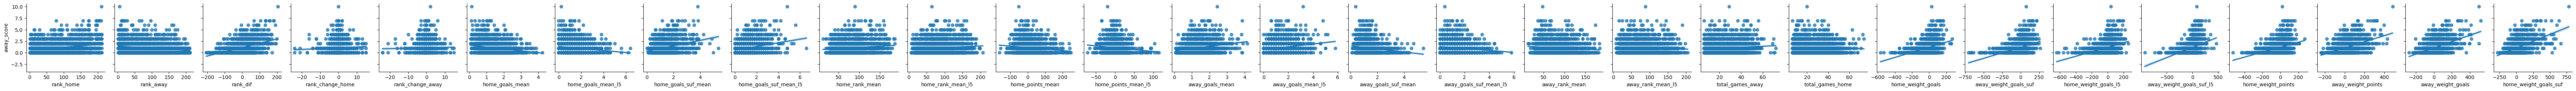

In [19]:
sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features)


In [20]:
pos_cols = [['away_weight_goals','home_weight_goals_suf',],
            ['home_weight_points','away_weight_points',]]

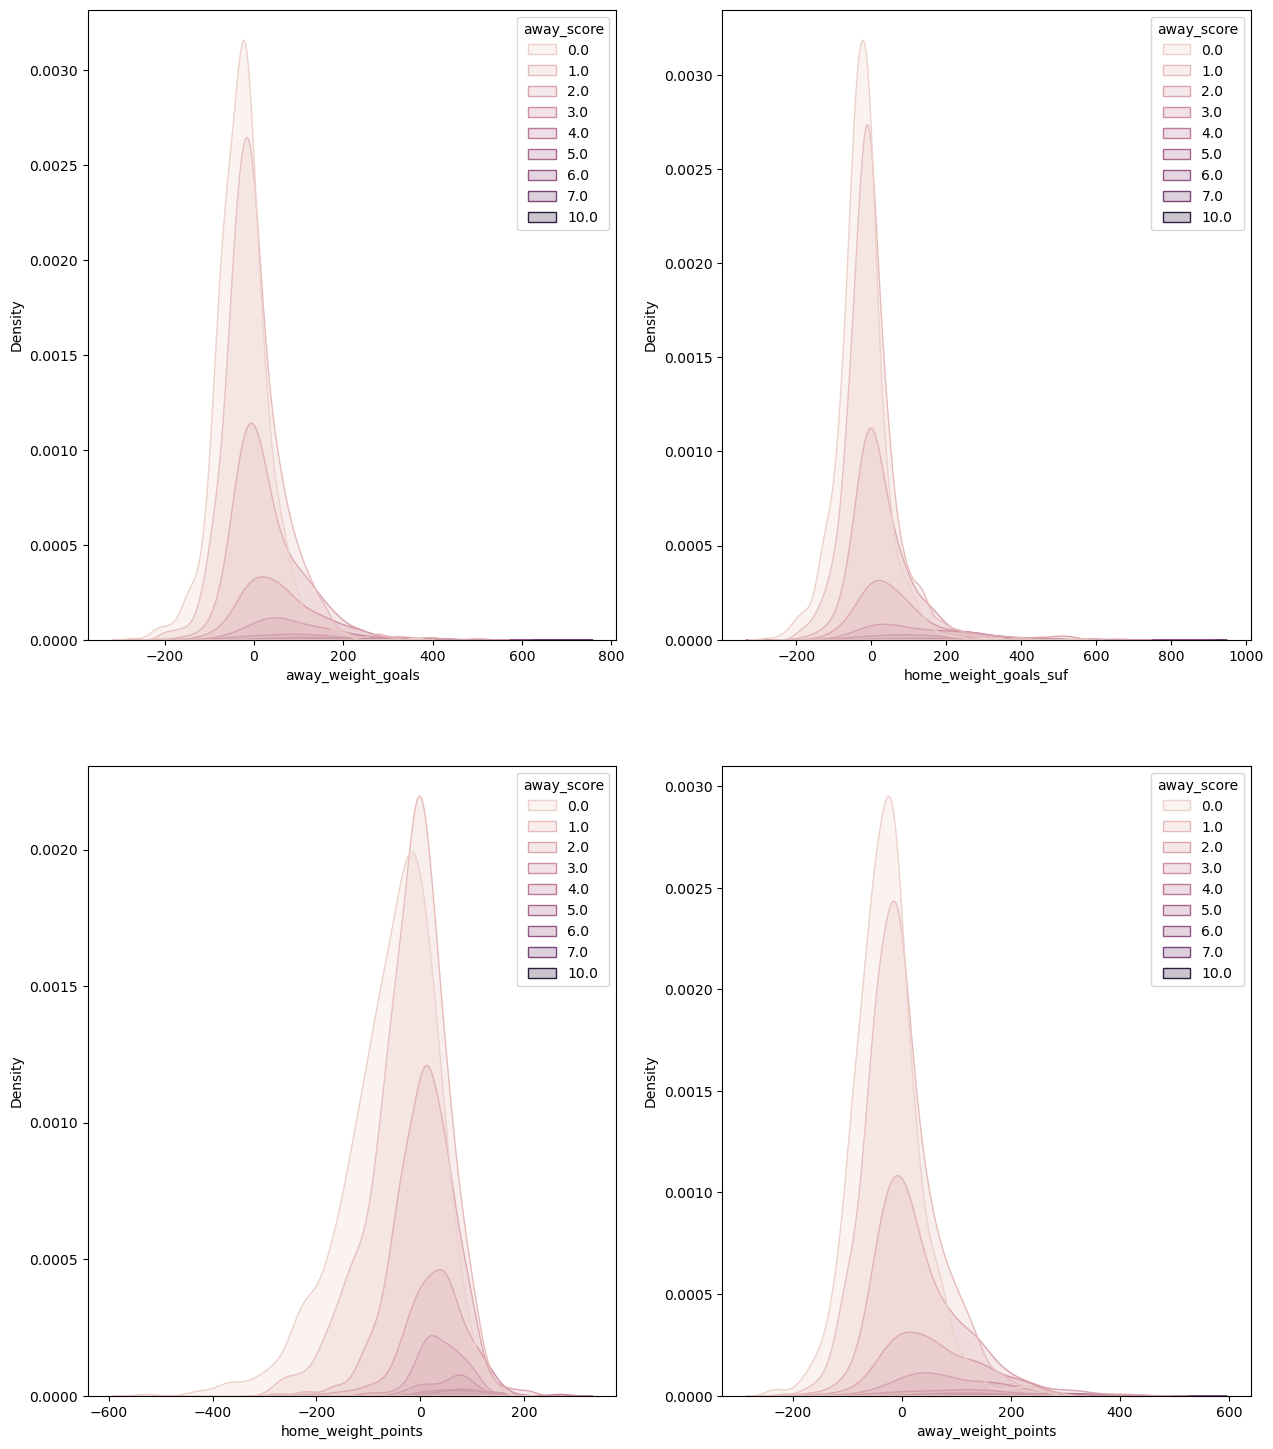

In [21]:
f, axes = plt.subplots(2, 2, figsize=(15, 18))

for (ax, pc) in zip(axes, pos_cols):
    sns.kdeplot(data = df_feats, x = pc[0], hue = target, fill=True, warn_singular=False, ax=ax[0])
    sns.kdeplot(data = df_feats, x = pc[1], hue = target, fill=True, warn_singular=False, ax=ax[1])

In [22]:
away_cols = ['away_weight_goals','home_weight_goals_suf','home_weight_points','away_weight_points']

In [23]:
df_model[["away_score"]+away_cols].to_csv("data/away_db.csv", index=False)